In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)  

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
trainset_np = np.asarray(trainset.data)
trainset_labels = np.asarray(trainset.targets)
testset_np = np.asarray(testset.data)
testset_labels = np.asarray(testset.targets)

trainset_np = np.asarray(trainset.data)
trainset_labels = np.asarray(trainset.targets)
testset_np = np.asarray(testset.data)
testset_labels = np.asarray(testset.targets)

validset_np = trainset_np[40000:50000]
validset_labels = trainset_labels[40000:50000]
trainset_np = trainset_np[0:40000]
trainset_labels = trainset_labels[0:40000]
print(trainset_np.shape)
print(trainset_labels.shape)
print(validset_np.shape)
print(validset_labels.shape)
print(testset_np.shape)
print(testset_labels.shape)

(40000, 32, 32, 3)
(40000,)
(10000, 32, 32, 3)
(10000,)
(10000, 32, 32, 3)
(10000,)


In [17]:
def imshow(img):
    plt.imshow(img)
    plt.show()

In [6]:
trainset_flattened = np.empty((40000,3072))
validset_flattened = np.empty((10000,3072))
testset_flattened = np.empty((10000,3072))

for i in range (trainset_np.shape[0]):
    trainset_flattened[i] = trainset_np[i].flatten()

for i in range (validset_np.shape[0]):
    validset_flattened[i] = validset_np[i].flatten()

for i in range (testset_np.shape[0]):
    testset_flattened[i] = testset_np[i].flatten()

In [60]:
knn = KNeighborsClassifier()
knn.fit(trainset_flattened, trainset_labels)

KNeighborsClassifier()

In [61]:
y_pred = knn.predict(validset_flattened)

In [63]:
acc = accuracy_score(y_pred, validset_labels)
print(acc)

0.3283


In [65]:
knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(trainset_flattened, trainset_labels)
y_pred2 = knn2.predict(validset_flattened)
acc2 = accuracy_score(y_pred2, validset_labels)
print(acc2)

0.3178


In [66]:
# "distance" weight scheme seems to be better than "uniform"
knn3 = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn3.fit(trainset_flattened, trainset_labels)
y_pred3 = knn3.predict(validset_flattened)
acc3 = accuracy_score(y_pred3, validset_labels)
print(acc3)

0.338


In [68]:
# p=1 is better than p=2
knn4 = KNeighborsClassifier(n_neighbors=10, weights='distance', p=1)
knn4.fit(trainset_flattened, trainset_labels)
y_pred4 = knn4.predict(validset_flattened)
acc4 = accuracy_score(y_pred4, validset_labels)
print(acc4)

0.3707


In [ ]:
# p3 test
knn5 = KNeighborsClassifier(n_neighbors=10, weights='distance', p=3)
knn5.fit(trainset, labels)
y_pred5 = knn5.predict(validset_flattened)
acc5 = accuracy_score(y_pred5, validset_labels)
print(acc5)

In [71]:
# Finding best training set size
for size in [5000, 10000, 20000, 30000, 40000]:
    trainset = trainset_flattened[:size]
    labels = trainset_labels[:size]
    knn = KNeighborsClassifier()
    knn.fit(trainset, labels)
    y_pred = knn.predict(validset_flattened)
    acc = accuracy_score(y_pred, validset_labels)
    print(f"Accuracy for size {size}: {acc}")

Accuracy for size 5000: 0.2637
Accuracy for size 10000: 0.2851
Accuracy for size 20000: 0.3036
Accuracy for size 30000: 0.3163
Accuracy for size 40000: 0.3283


In [12]:
# Metric: cityblock, l1, manhattan tied for first
trainset = trainset_flattened[:5000]
labels = trainset_labels[:5000]

for m in ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan', 'nan_euclidean']:
    knn = KNeighborsClassifier(metric=m)
    knn.fit(trainset, labels)
    y_pred = knn.predict(validset_flattened)
    acc = accuracy_score(y_pred, validset_labels)
    print(f"Accuracy for metric {m}: {acc}")

Accuracy for metric cityblock: 0.2914
Accuracy for metric cosine: 0.2759
Accuracy for metric euclidean: 0.2637
Accuracy for metric l1: 0.2914
Accuracy for metric l2: 0.2637
Accuracy for metric manhattan: 0.2914
Accuracy for metric nan_euclidean: 0.2637


In [15]:
# Algorithm
for alg in ['auto', 'ball_tree', 'kd_tree', 'brute']:
    knn = KNeighborsClassifier(algorithm=alg, n_jobs=-1)
    knn.fit(trainset, labels)
    y_pred = knn.predict(validset_flattened)
    acc = accuracy_score(y_pred, validset_labels)
    print(f"Accuracy for algorithm {alg}: {acc}")

Accuracy for algorithm auto: 0.2637
Accuracy for algorithm ball_tree: 0.2637
Accuracy for algorithm kd_tree: 0.2637
Accuracy for algorithm brute: 0.2637


In [16]:
# leaf_size
for ls in range(20, 41):
    knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=ls, n_jobs=-1)
    knn.fit(trainset, labels)
    y_pred = knn.predict(validset_flattened)
    acc = accuracy_score(y_pred, validset_labels)
    print(f"Accuracy for leaf size {ls}: {acc}")

Accuracy for leaf size 20: 0.2637
Accuracy for leaf size 21: 0.2637


KeyboardInterrupt: 

In [37]:
# Best Classifier!!
knn = KNeighborsClassifier(weights='distance', p=1, metric='l1')
knn.fit(trainset_flattened, trainset_labels)
y_pred = knn.predict(validset_flattened)
acc = accuracy_score(y_pred, validset_labels)
print(acc)

0.3728


In [38]:
# Time to try on test set
y_pred_te = knn.predict(testset_flattened)
acc_te = accuracy_score(y_pred_te, testset_labels)
print(acc_te)

0.3843


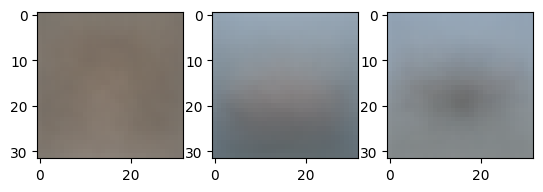

In [36]:
# Data analysis

cat = np.zeros((32,32,3))
cat_cnt = 0

ship = np.zeros((32,32,3))
ship_cnt = 0

plane = np.zeros((32,32,3))
plane_cnt = 0

trainset_flt = trainset_np / 255

for i in range(10000):
    if trainset_labels[i] == 3:
        cat += trainset_flt[i]
        cat_cnt += 1
    if trainset_labels[i] == 8:
        ship += trainset_flt[i]
        ship_cnt += 1
    if trainset_labels[i] == 0:
        plane += trainset_flt[i]
        plane_cnt += 1

cat_avg = np.divide(cat, cat_cnt)
ship_avg = np.divide(ship, ship_cnt)
plane_avg = np.divide(plane, plane_cnt)


fig, axes = plt.subplots(1, 3)

axes[0].imshow(cat_avg)
axes[1].imshow(ship_avg)
axes[2].imshow(plane_avg)

plt.show()
